In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = {
    'Student_ID': range(1, 101),
    'Math_Score': np.random.randint(40, 100, 100),
    'English_Score': np.random.randint(40, 100, 100),
    'Science_Score': np.random.randint(40, 100, 100),
    'Attendance': np.random.choice([0, 1], size=100)
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,Student_ID,Math_Score,English_Score,Science_Score,Attendance
0,1,73,68,59,0
1,2,70,67,56,1
2,3,45,46,81,1
3,4,85,73,77,1
4,5,66,40,63,1
...,...,...,...,...,...
95,96,95,86,70,0
96,97,64,44,54,0
97,98,57,96,44,0
98,99,98,73,42,0


In [7]:
df.isnull().sum()

Student_ID       0
Math_Score       0
English_Score    0
Science_Score    0
Attendance       0
dtype: int64

In [8]:
df.dtypes

Student_ID       int64
Math_Score       int32
English_Score    int32
Science_Score    int32
Attendance       int32
dtype: object

<Axes: >

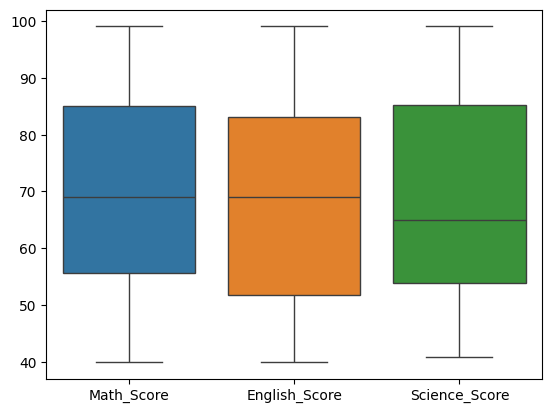

In [9]:
sns.boxplot(data=df[['Math_Score', 'English_Score', 'Science_Score']])

In [10]:
# outlier nhi h toh khud se daal rhe h
df.loc[df['Math_Score'] > 85, 'Math_Score'] += 100
df['Math_Score']

0      73
1      70
2      45
3      85
4      66
     ... 
95    195
96     64
97     57
98    198
99     85
Name: Math_Score, Length: 100, dtype: int32

<Axes: >

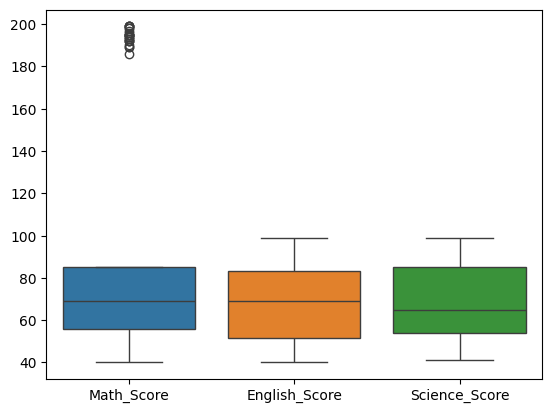

In [11]:
sns.boxplot(data=df[['Math_Score', 'English_Score', 'Science_Score']])

In [12]:
#IQR

q1=df.Math_Score.quantile(0.25)
q2=df.Math_Score.quantile(0.75)
q1,q2

(55.75, 85.0)

In [13]:
IQR=q2-q1
IQR
#iqr is diff between 25% and 75% value

29.25

In [14]:
lower_limit=q1-1.5*IQR
upper_limit=q2+1.5*IQR
lower_limit,upper_limit

(11.875, 128.875)

In [15]:
df[(df.Math_Score<lower_limit) | (df.Math_Score>upper_limit)]

#yeah yeah outliers value h dataset me

,Student_ID,Math_Score,English_Score,Science_Score,Attendance
11,12,193,49,88,0
20,21,193,63,96,1
22,23,194,78,90,0
26,27,199,52,80,0
29,30,199,56,93,1
38,39,199,88,65,1
41,42,195,92,65,1
43,44,192,90,53,1
49,50,189,94,42,0
51,52,195,44,45,1


In [22]:
df[(df.Math_Score>lower_limit) & (df.Math_Score<upper_limit)]
#issey outlier hatt gye

,Student_ID,Math_Score,English_Score,Science_Score,Attendance,Log_Math_Score
0,1,73,68,59,0,4.290459
1,2,70,67,56,1,4.248495
2,3,45,46,81,1,3.806662
3,4,85,73,77,1,4.442651
4,5,66,40,63,1,4.189655
...,...,...,...,...,...,...
92,93,68,55,95,0,4.219508
94,95,46,42,51,0,3.828641
96,97,64,44,54,0,4.158883
97,98,57,96,44,0,4.043051


<Axes: xlabel='Math_Score', ylabel='Count'>

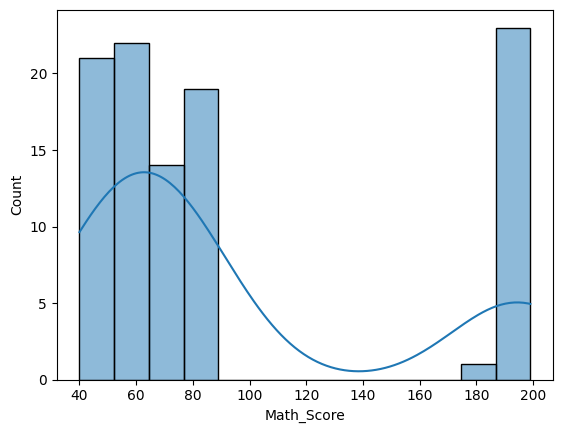

In [24]:
# data transformation

sns.histplot(df['Math_Score'], kde=True)

<Axes: xlabel='Log_Math_Score', ylabel='Count'>

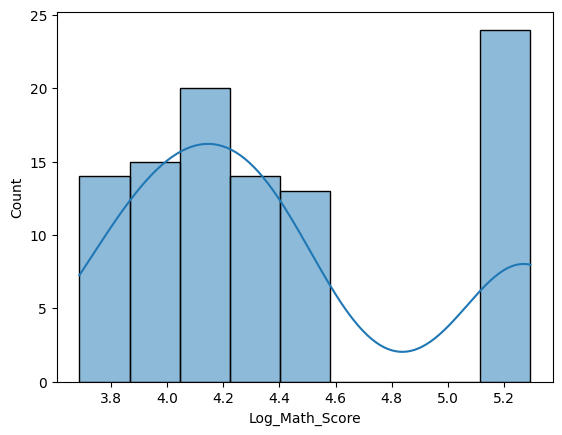

In [25]:
#log distributin
df['Log_Math_Score'] = np.log(df['Math_Score'])
sns.histplot(df['Log_Math_Score'], kde=True)